Contributors: **Rohit Singh Rathaur, Girish L.** 

Copyright [2021](2021) [*Rohit Singh Rathaur, BIT Mesra and Girish L., CIT GUBBI, Karnataka*]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

In [ ]:
df_Ellis  = pd.read_csv("/content/drive/MyDrive/LFN Anuket/Analysis/data/Final/Ellis_FinalTwoConditionwithOR.csv")
df_Ellis

,Timestamp,ellis-cpu.system_perc,ellis-cpu.wait_perc,ellis-load.avg_1_min,ellis-mem.free_mb,ellis-net.in_bytes_sec,ellis-net.out_packets_sec,Label
0,14-09-2016 0:00,0.5,12.9,1.730,3949,5413.200,62.067,1
1,14-09-2016 0:00,0.4,10.3,1.790,3950,5201.667,59.567,1
2,14-09-2016 0:01,0.4,11.8,1.520,3950,5370.733,61.200,1
3,14-09-2016 0:01,0.4,12.9,1.430,3949,5292.467,60.400,1
4,14-09-2016 0:02,0.5,12.1,1.440,3950,5318.167,61.700,1
...,...,...,...,...,...,...,...,...
176995,13-12-2016 21:20,0.4,0.3,0.030,3484,230.967,2.167,0
176996,13-12-2016 21:20,0.2,0.3,0.018,3484,218.433,0.767,0
176997,13-12-2016 21:21,0.6,0.3,0.010,3483,160.967,1.867,0
176998,13-12-2016 21:21,0.6,0.3,0.007,3484,188.367,2.100,0


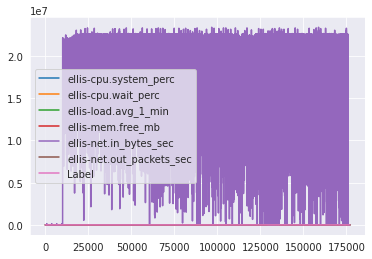

In [ ]:
df_Ellis.plot()

We showed here the histograms of Ellis data

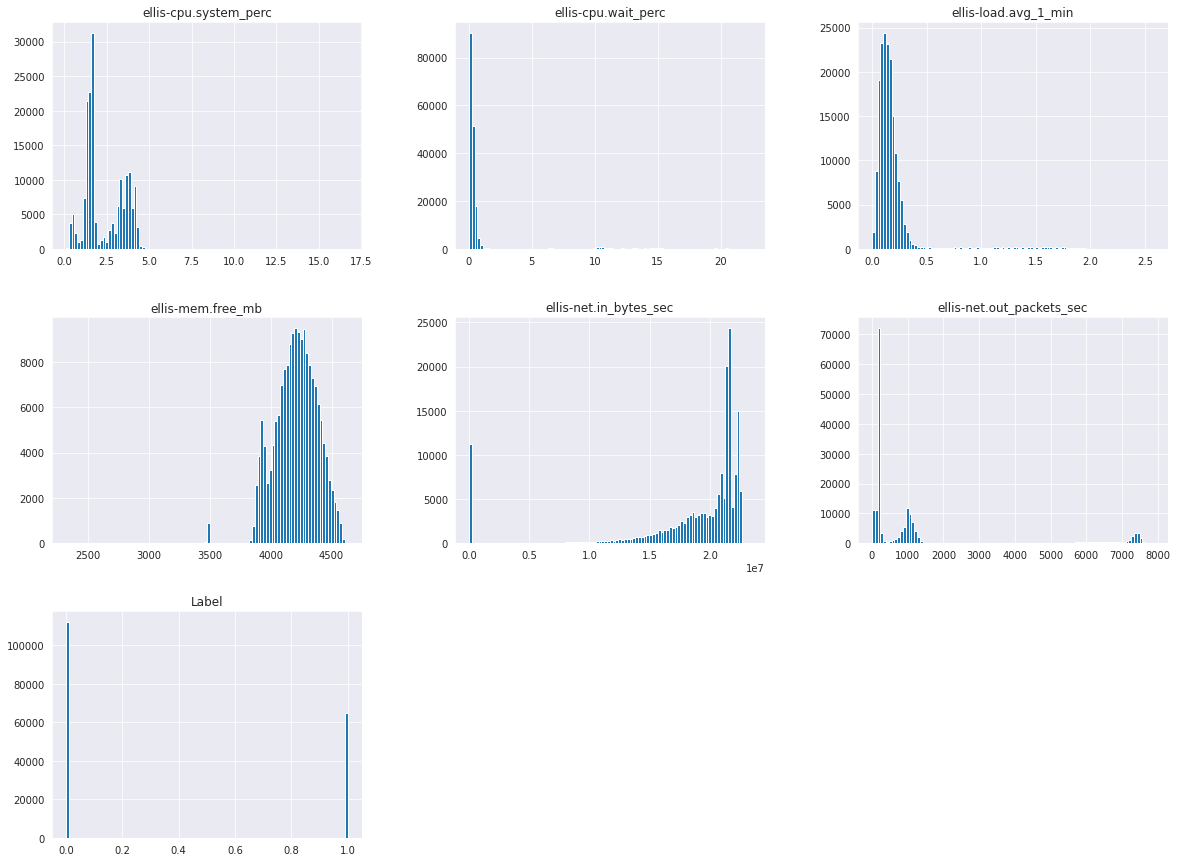

In [ ]:
# we show here the hist
df_Ellis.hist(bins=100,figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

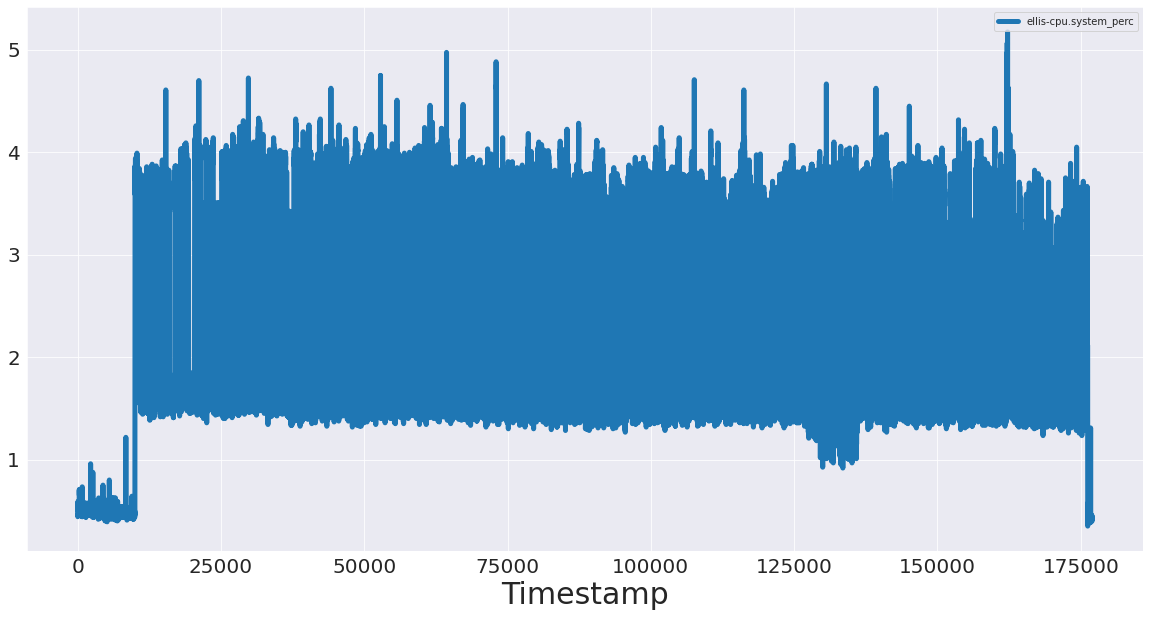

In [ ]:
cpu_system_perc = df_Ellis[['ellis-cpu.system_perc']] 
cpu_system_perc.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Timestamp', fontsize=30);

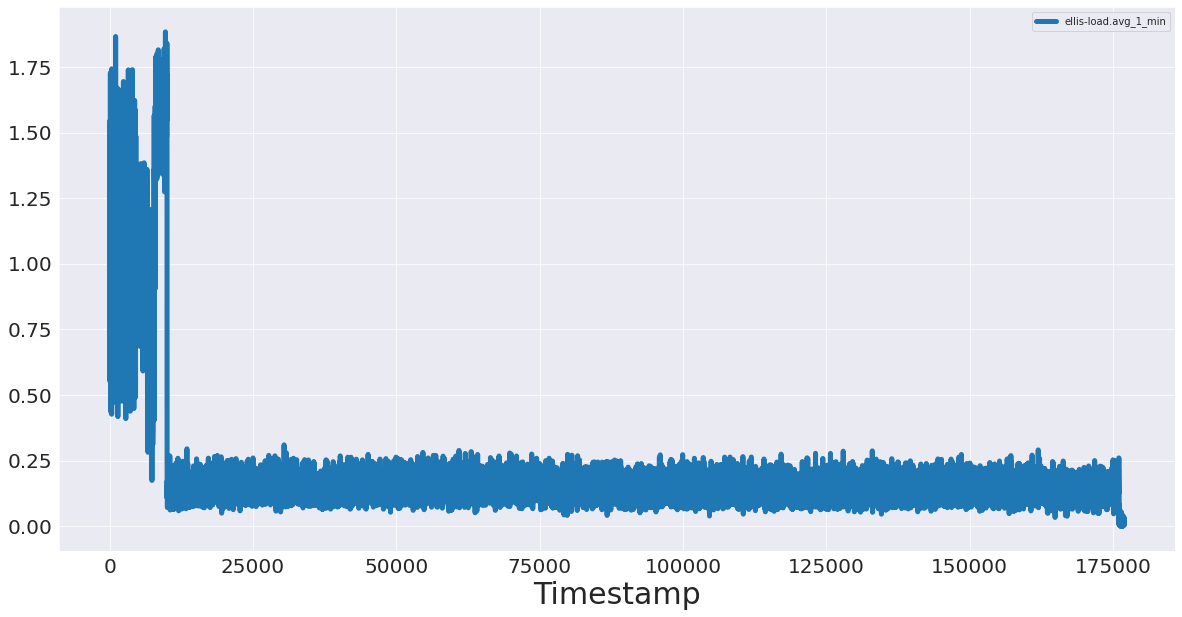

In [ ]:
load_avg_1_min = df_Ellis[['ellis-load.avg_1_min']] 
load_avg_1_min.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Timestamp', fontsize=30);

## Identifying trends in Time Series data
There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, we take the average of the points on either side of it. Note that the number of points is specified by a window size, which we need to choose.

What happens then because we take the average is it tends to smooth out noise and seasonality. We will see that below right now. Check out this rolling average of `'ellis-cpu.wait_perc'` using the built-in `pandas` methods.

When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as we're talking about yearly seasonality.

Note that in the code chunk above we used two sets of squared brackets to extract the `'ellis-cpu.wait_perc'` column as a DataFrame; If we would have used one set, like `df_Ellis['ellis-cpu.wait_perc']`, we would have created a pandas Series.

In the code chunk above, you also chained methods: you called methods on an object one after another. Method chaining is pretty popular and pandas is one of the packages that really allows you to use that style of programming to the max!

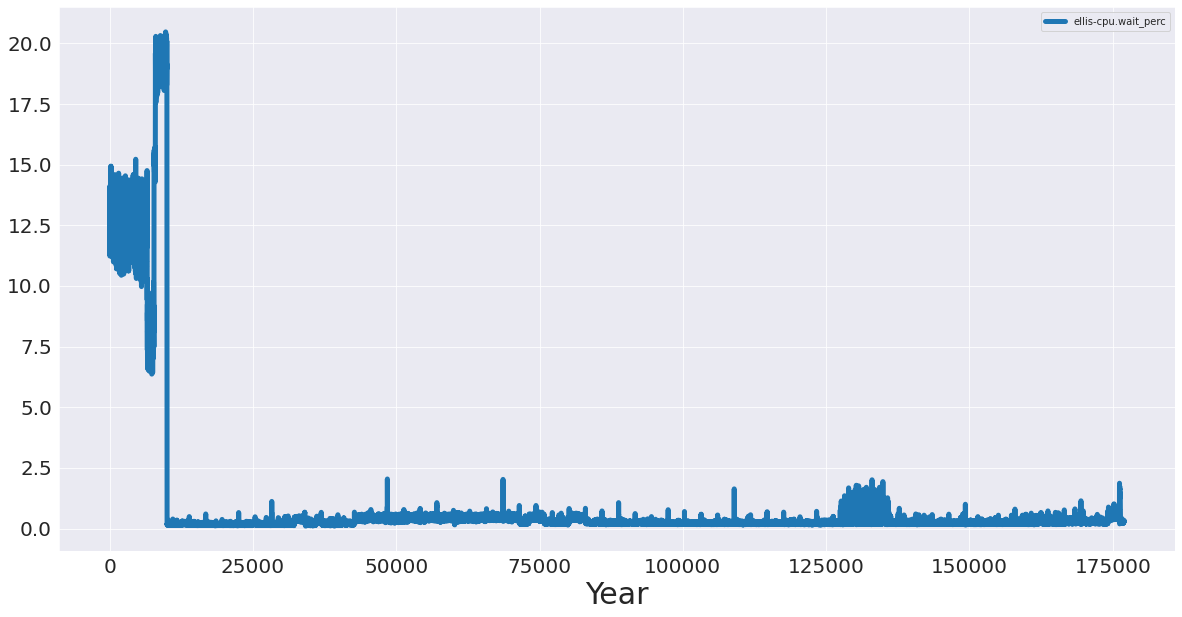

In [ ]:
cpu_wait_perc = df_Ellis[['ellis-cpu.wait_perc']] 
cpu_wait_perc.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=30);

We have successfully removed the seasonality and we saw an upward trend for `ellis-cpu.wait_perc`! But how do these two search terms compare?

We can figure this out by plotting the trends of `'ellis-cpu.wait_perc'`, `cpu_system_perc` and `'load_avg_1_min'` on a single figure:

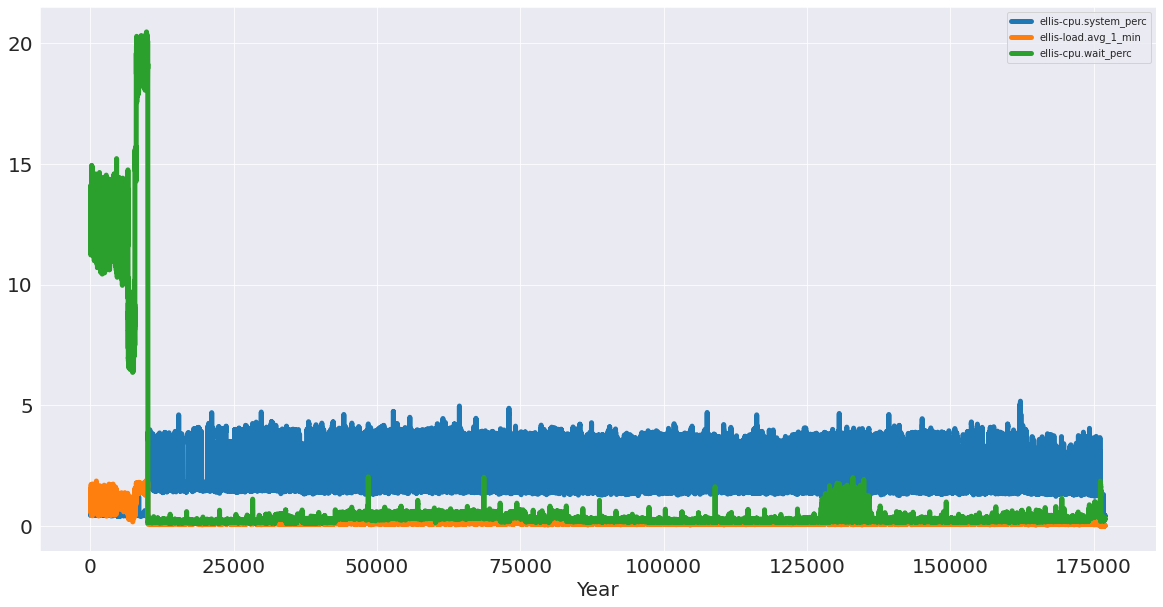

In [ ]:
df_dg = pd.concat([cpu_system_perc.rolling(12).mean(), load_avg_1_min.rolling(12).mean(),cpu_wait_perc.rolling(12).mean()], axis=1) 
df_dg.plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20); 

We established the correlation matrix for Ellis data.
Seaborn has five built-in themes to style its plots: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. Seaborn defaults to using the darkgrid theme for its plots, but we can change this styling to better suit our presentation needs.

To use any of the preset themes pass the name of it to `sns.set_style()`.

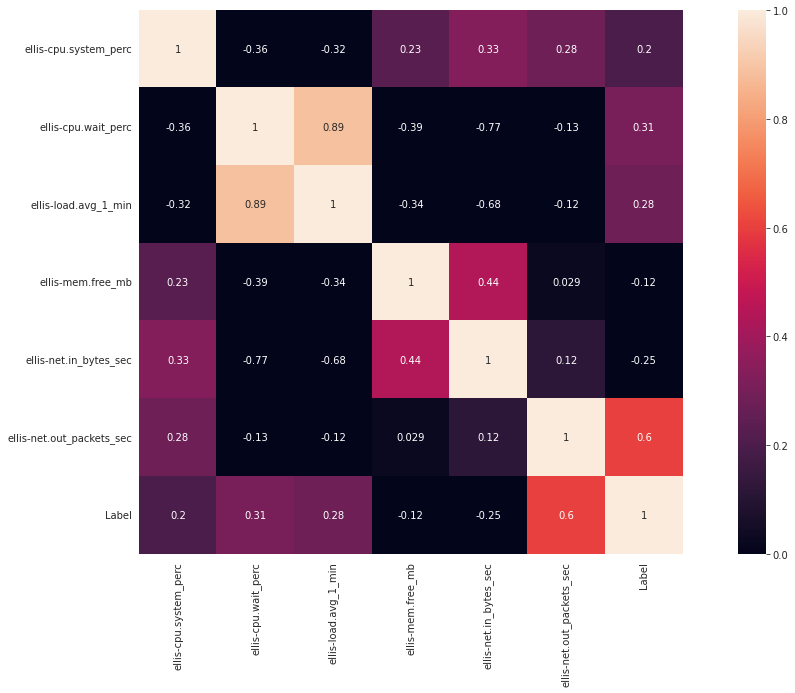

In [ ]:
# we establish the corrmartrice
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

correaltionMatrice = df_Ellis.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correaltionMatrice, cbar=True, vmin=0, vmax=1, square=True, annot=True);
plt.show()

Correlation between rows or columns of two DataFrame objectsCompute pairwise

In [ ]:
df_Ellis.corrwith(df_Ellis['ellis-load.avg_1_min'])

ellis-cpu.system_perc       -0.316956
ellis-cpu.wait_perc          0.886739
ellis-load.avg_1_min         1.000000
ellis-mem.free_mb           -0.335300
ellis-net.in_bytes_sec      -0.681849
ellis-net.out_packets_sec   -0.116851
Label                        0.279330
dtype: float64

In [ ]:
## ## using multivariate feature 

features_3 = ['ellis-cpu.wait_perc', 'ellis-load.avg_1_min', 'ellis-net.in_bytes_sec', 'Label']

features = df_Ellis[features_3]
features.index = df_Ellis['Timestamp']
features.head()

,ellis-cpu.wait_perc,ellis-load.avg_1_min,ellis-net.in_bytes_sec,Label
Timestamp,,,,
14-09-2016 0:00,12.9,1.73,5413.200,1
14-09-2016 0:00,10.3,1.79,5201.667,1
14-09-2016 0:01,11.8,1.52,5370.733,1
14-09-2016 0:01,12.9,1.43,5292.467,1
14-09-2016 0:02,12.1,1.44,5318.167,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3f21c0790>,
      dtype=object)

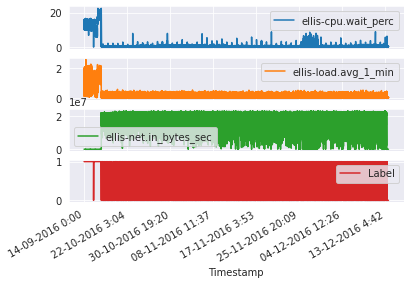

In [ ]:
features.plot(subplots=True)

In [ ]:
features = features.values

train test split for simple time series moving window average

In [ ]:
### standardize data
train_split = 141600
tf.random.set_seed(13)

### standardize data
features_mean = features[:train_split].mean()
features_std = features[:train_split].std()
features  = (features - features_mean)/ features_std

print(type(features))
print(features.shape)


<class 'numpy.ndarray'>
(177000, 4)


Created multivariate data

In [ ]:
### create mutlivariate data

def mutlivariate_data(features , target , start_idx , end_idx , history_size , target_size,
                      step ,  single_step = False):
  data = []
  labels = []
  start_idx = start_idx + history_size
  if end_idx is None:
    end_idx = len(features)- target_size
  for i in range(start_idx , end_idx ):
    idxs = range(i-history_size, i, step) ### using step
    data.append(features[idxs])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data) , np.array(labels)

In [ ]:
### generate multivariate data

history = 720
future_target = 72
STEP = 6

x_train_ss , y_train_ss = mutlivariate_data(features , features[:, 1], 0, train_split, history,
                                            future_target, STEP , single_step = True)

x_val_ss , y_val_ss = mutlivariate_data(features , features[:,1] , train_split , None , history ,
                                        future_target, STEP, single_step = True)

print(x_train_ss.shape , y_train_ss.shape)
print(x_val_ss.shape , y_val_ss.shape)

(140880, 120, 4) (140880,)
(34608, 120, 4) (34608,)


The `tf.data.Dataset` API supports writing descriptive and efficient input pipelines. Dataset usage following a common pattern:
- Creating a source dataset from our input data.
- Applied dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.
Note: Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.
Once we have a dataset, we can apply transformations to prepare the data for our model:

In [ ]:
## tensorflow dataset
batch_size = 256
buffer_size = 10000

train_ss = tf.data.Dataset.from_tensor_slices((x_train_ss, y_train_ss))
train_ss = train_ss.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_ss = tf.data.Dataset.from_tensor_slices((x_val_ss, y_val_ss))
val_ss = val_ss.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_ss)
print(val_ss)

<RepeatDataset shapes: ((None, 120, 4), (None,)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 120, 4), (None,)), types: (tf.float64, tf.float64)>


In [ ]:
x_train_ss.shape[-2:]

(120, 4)

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
from keras.layers import Activation, Dense, Dropout
from keras.utils.vis_utils import plot_model
### Modelling using LSTM
steps = 50

EPOCHS =20

single_step_model = tf.keras.models.Sequential()

single_step_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True, input_shape = x_train_ss.shape[-2:])))
#single_step_model.add(tf.keras.layers.Dropout(0.3))
single_step_model.add(tf.keras.layers.LSTM(units=100,return_sequences=False))
#single_step_model.add(tf.keras.layers.Dropout(0.2))
#model.add(Dense(units=1, activation='relu'))
single_step_model.add(tf.keras.layers.Activation("relu"))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mae',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
#single_step_model.compile(loss='mse', optimizer='rmsprop')

single_step_model_history = single_step_model.fit(train_ss, epochs = EPOCHS , 
                                                  steps_per_epoch =steps, validation_data = val_ss,
                                                  validation_steps = 50)

plot_model(single_step_model, to_file='/content/drive/MyDrive/LFN Anuket/Analysis/data/Final/Bi-LSTM.png', show_shapes=True, show_layer_names=True)
single_step_model.summary()



Epoch 1/20
50/50 [==============================] - 52s 924ms/step - loss: 0.0746 - rmse: 0.1454 - val_loss: 0.0103 - val_rmse: 0.0111
Epoch 2/20
50/50 [==============================] - 45s 900ms/step - loss: 0.0075 - rmse: 0.0093 - val_loss: 0.0136 - val_rmse: 0.0137
Epoch 3/20
50/50 [==============================] - 45s 898ms/step - loss: 0.0068 - rmse: 0.0077 - val_loss: 0.0027 - val_rmse: 0.0033
Epoch 4/20
50/50 [==============================] - 44s 893ms/step - loss: 0.0089 - rmse: 0.0104 - val_loss: 0.0058 - val_rmse: 0.0062
Epoch 6/20
50/50 [==============================] - 45s 896ms/step - loss: 0.0081 - rmse: 0.0088 - val_loss: 0.0100 - val_rmse: 0.0102
Epoch 7/20
50/50 [==============================] - 45s 908ms/step - loss: 0.0063 - rmse: 0.0072 - val_loss: 0.0054 - val_rmse: 0.0057
Epoch 8/20
50/50 [==============================] - 45s 911ms/step - loss: 0.0030 - rmse: 0.0038 - val_loss: 0.0044 - val_rmse: 0.0046
Epoch 9/20
50/50 [==============================] - 45s

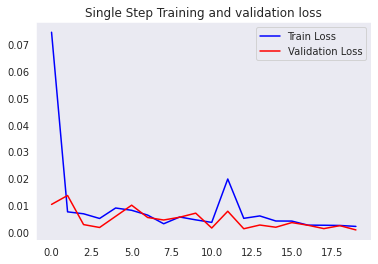

In [ ]:
## plot train test loss 

def plot_loss(history , title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss , 'b' , label = 'Train Loss')
  plt.plot(epochs, val_loss , 'r' , label = 'Validation Loss')
  plt.title(title)
  plt.legend()
  plt.grid()
  plt.show()

plot_loss(single_step_model_history , 'Single Step Training and validation loss')

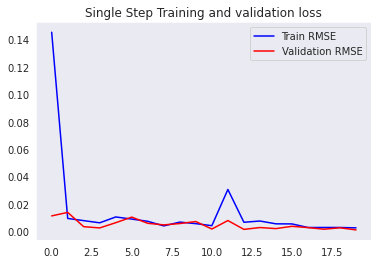

In [ ]:
## plot train test loss 

def plot_loss(history , title):
  loss = history.history['rmse']
  val_loss = history.history['val_rmse']

  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss , 'b' , label = 'Train RMSE')
  plt.plot(epochs, val_loss , 'r' , label = 'Validation RMSE')
  plt.title(title)
  plt.legend()
  plt.grid()
  plt.show()

plot_loss(single_step_model_history , 'Single Step Training and validation loss')

In [ ]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step')
  return plt

In [ ]:
### Moving window average

def MWA(history):
  return np.mean(history)

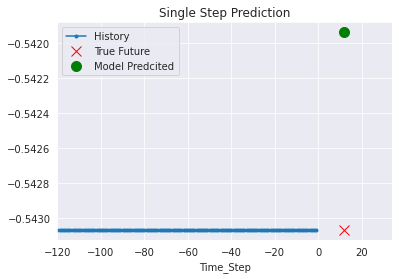

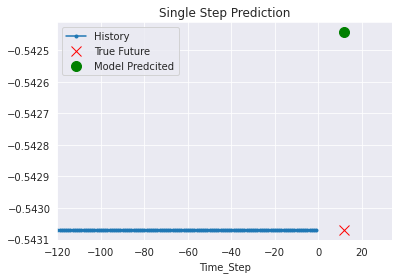

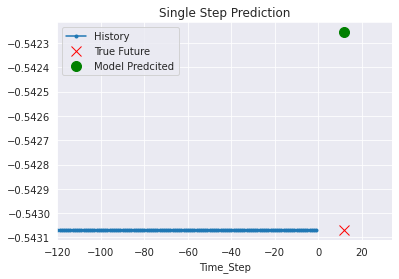

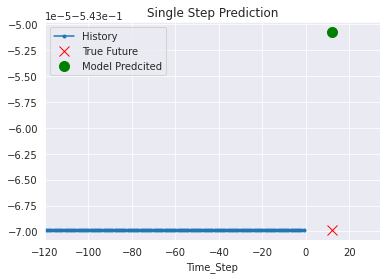

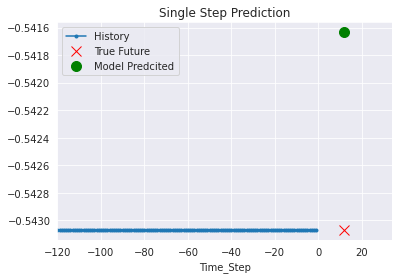

In [ ]:
# plot time series and predicted values

for x, y in val_ss.take(5):
  plot = plot_time_series([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

# **MultiStep Forcasting**

In [ ]:
future_target = 72 # 72 future values
x_train_multi, y_train_multi = mutlivariate_data(features, features[:, 1], 0,
                                                 train_split, history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = mutlivariate_data(features, features[:, 1],
                                             train_split, None, history,
                                             future_target, STEP)

print(x_train_multi.shape)
print(y_train_multi.shape)

(140880, 120, 4)
(140880, 72)


In [ ]:
#  TF DATASET

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(batch_size).repeat()

In [ ]:
print(train_data_multi)
print(val_data_multi)

<RepeatDataset shapes: ((None, 120, 4), (None, 72)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 120, 4), (None, 72)), types: (tf.float64, tf.float64)>


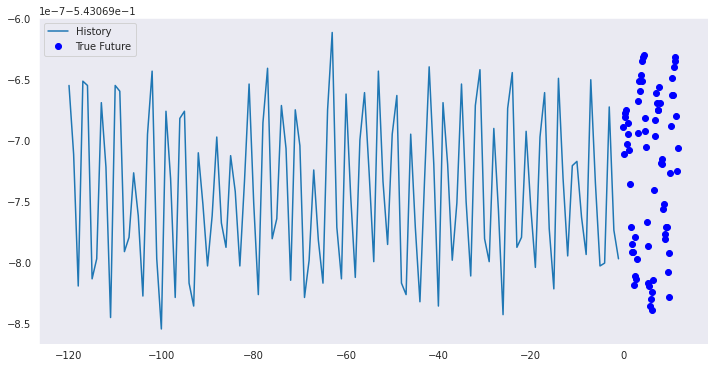

In [ ]:
#plotting function
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  plt.grid()
  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()
  


for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

Bi-directional LSTM:
On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations. This is known as bidirectional.

Here, `tf.keras.layers.Bidirectional` is a bidirectional wrapper for RNNs which inherits from `Wrapper`, `Layer`, and `module`

In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:])))
multi_step_model.add(tf.keras.layers.Dropout(0.2))
multi_step_model.add(tf.keras.layers.LSTM(units=100,return_sequences=False))
multi_step_model.add(tf.keras.layers.Dropout(0.2))
#model.add(Dense(units=1, activation='relu'))
multi_step_model.add(tf.keras.layers.Activation("relu"))
#aDD dropout layer (0.3)
multi_step_model.add(tf.keras.layers.Dense(72)) # for 72 outputs

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=steps,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/20
50/50 [==============================] - 54s 946ms/step - loss: 0.1534 - rmse: 0.2114 - val_loss: 0.0481 - val_rmse: 0.0489
Epoch 2/20
50/50 [==============================] - 46s 917ms/step - loss: 0.0785 - rmse: 0.0995 - val_loss: 0.0406 - val_rmse: 0.0412
Epoch 3/20
50/50 [==============================] - 46s 916ms/step - loss: 0.0619 - rmse: 0.0781 - val_loss: 0.0095 - val_rmse: 0.0100
Epoch 4/20
50/50 [==============================] - 46s 919ms/step - loss: 0.0526 - rmse: 0.0661 - val_loss: 0.0170 - val_rmse: 0.0172
Epoch 5/20
50/50 [==============================] - 46s 915ms/step - loss: 0.0466 - rmse: 0.0584 - val_loss: 0.0077 - val_rmse: 0.0080
Epoch 6/20
50/50 [==============================] - 46s 920ms/step - loss: 0.0421 - rmse: 0.0529 - val_loss: 0.0325 - val_rmse: 0.0326
Epoch 7/20
50/50 [==============================] - 47s 937ms/step - loss: 0.0390 - rmse: 0.0489 - val_loss: 0.0140 - val_rmse: 0.0141
Epoch 8/20
50/50 [==============================] - 47s

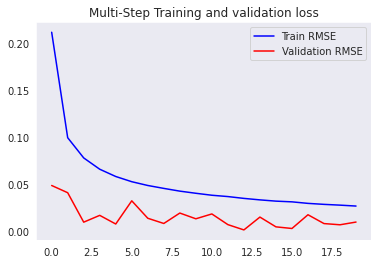

In [ ]:
plot_loss(multi_step_history, 'Multi-Step Training and validation loss')

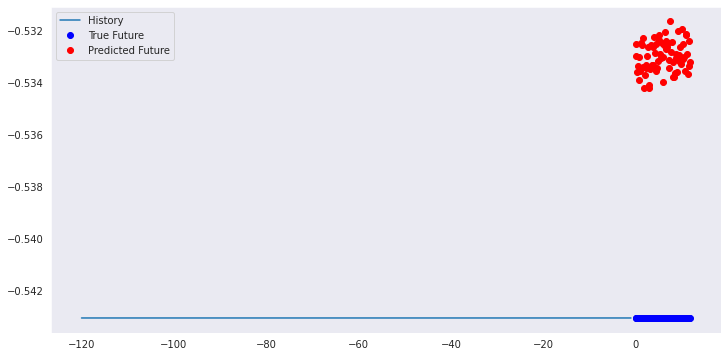

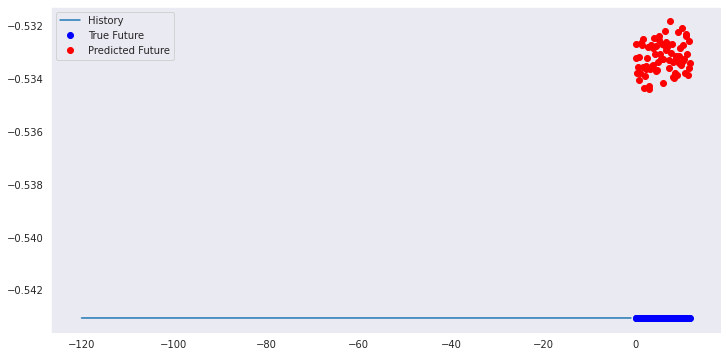

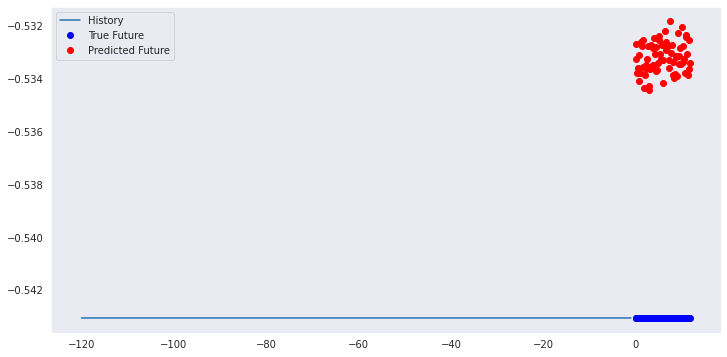

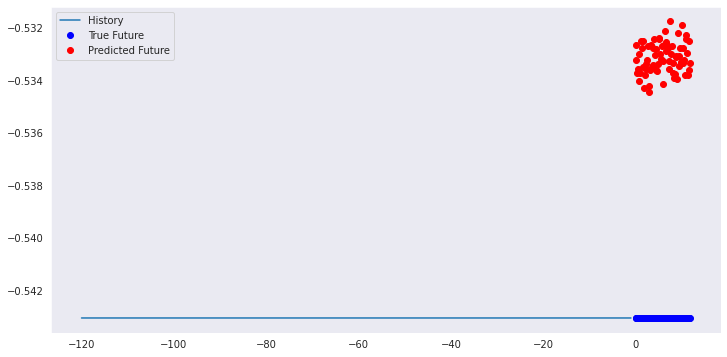

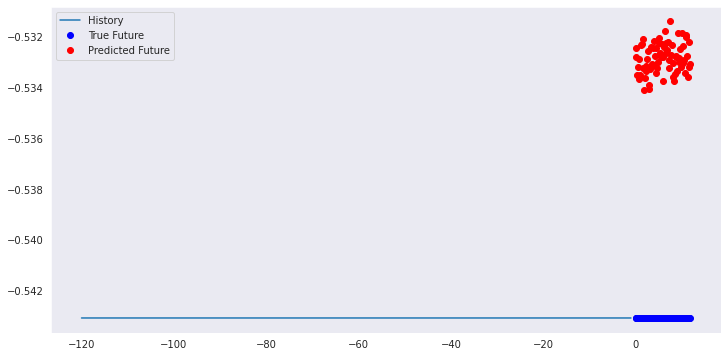

In [ ]:
for x, y in val_data_multi.take(5):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [ ]:
scores = multi_step_model.evaluate(x_train_multi, y_train_multi, verbose=1, batch_size=200)
print('MAE: {}'.format(scores[1]))

705/705 [==============================] - 132s 186ms/step - loss: 0.0101 - rmse: 0.0102
MAE: 0.010171186178922653


In [ ]:
scores_test = multi_step_model.evaluate(x_val_multi, y_val_multi, verbose=1, batch_size=200)
print('MAE: {}'.format(scores[1]))


In [ ]:
y_pred_test = multi_step_model.predict(x_val_multi, verbose=0)

plt.figure(figsize=(10,5))
plt.plot(y_pred_test)
plt.plot(y_val_multi)
plt.ylabel("Value")
plt.xlabel("Timestap")
plt.legend(loc='upper left')
plt.show()